In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('dnd_ability_score_data.csv')

[(6.0, 22.0), (6.0, 22.0)]

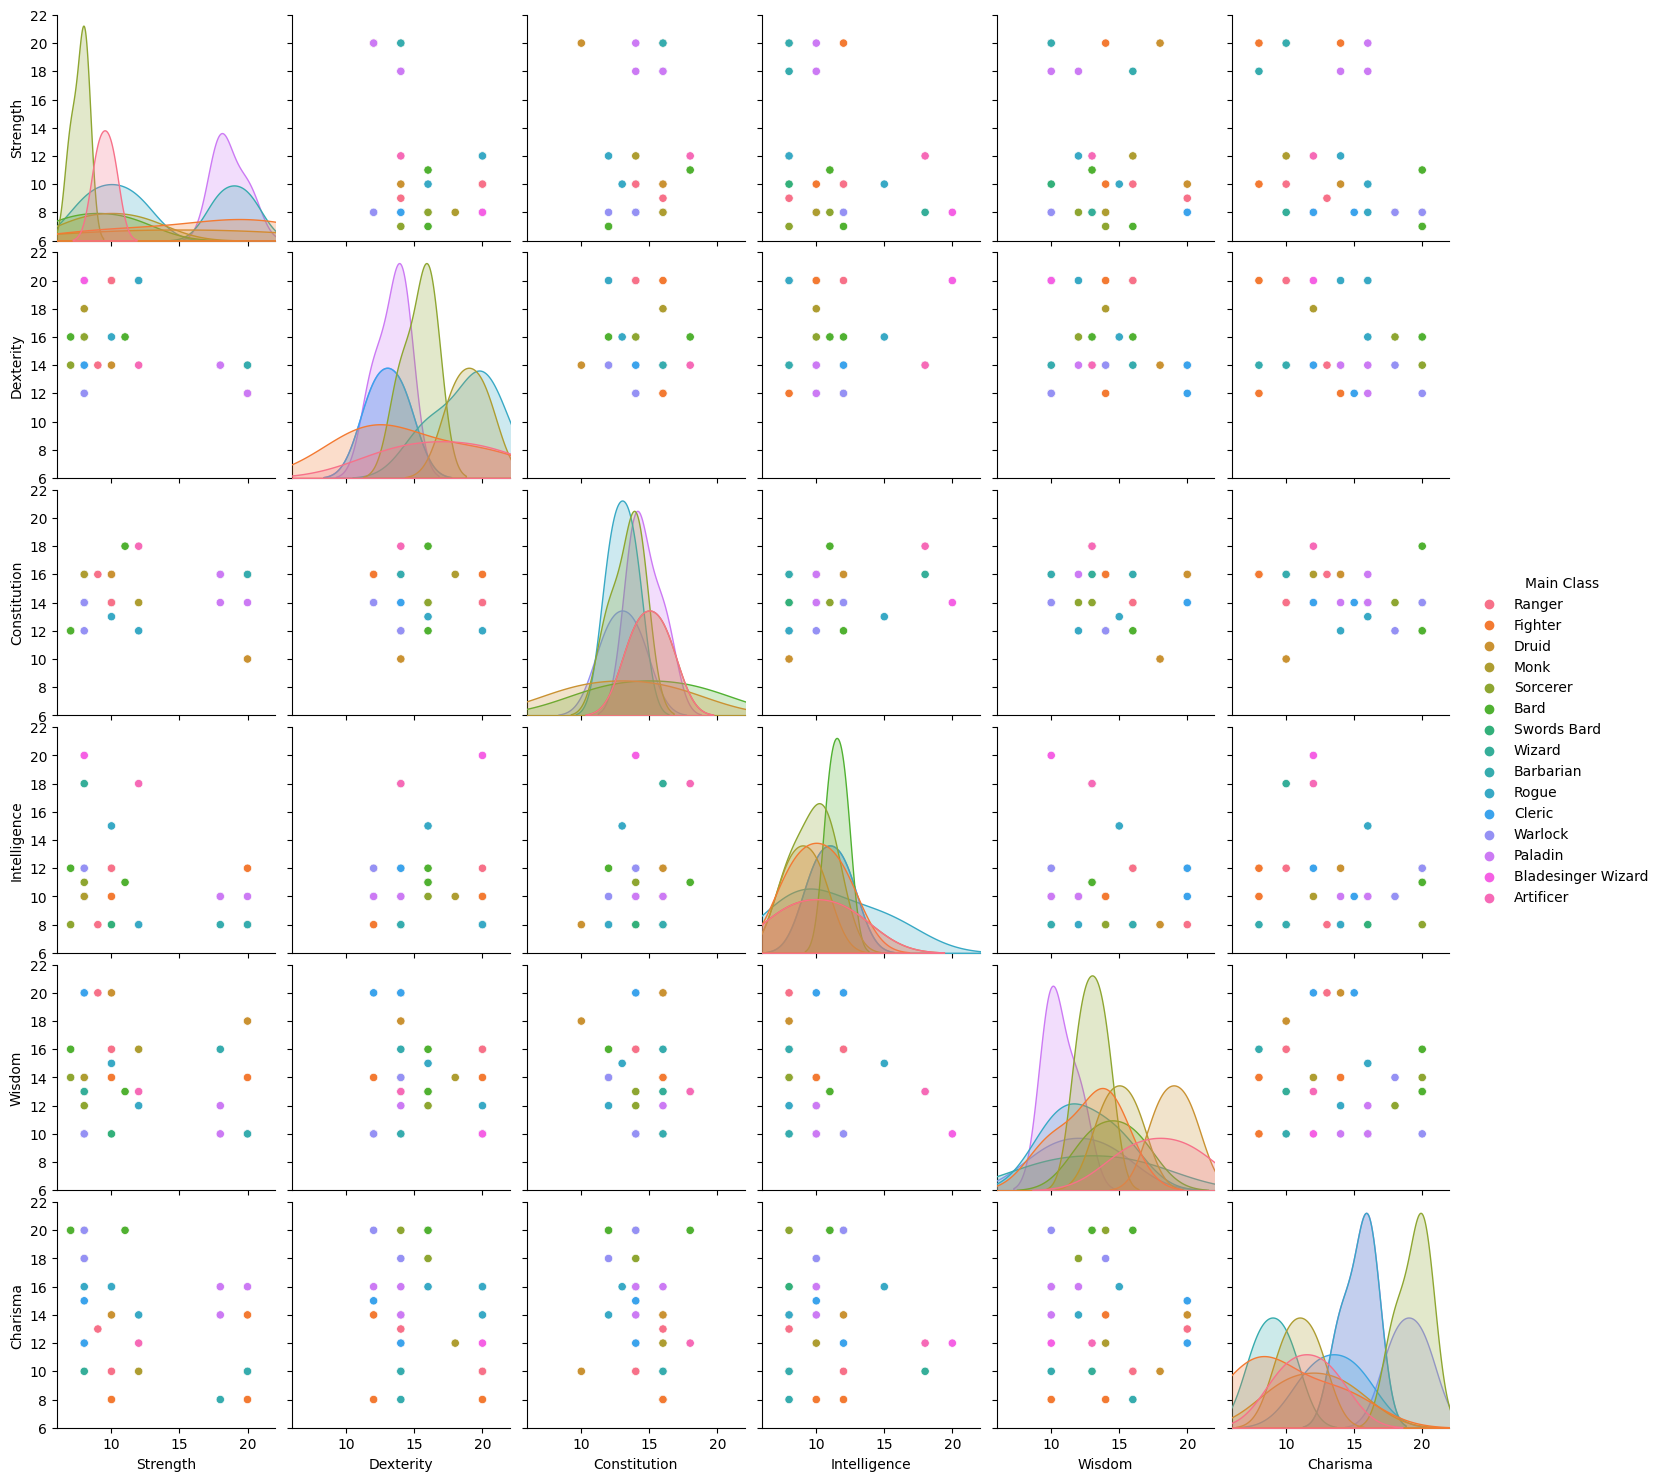

In [27]:
lim = (6, 22)

g = sns.pairplot(df, hue="Main Class")
g.axes[0, 1].set(xlim=lim, ylim=lim)
g.axes[1, 2].set(xlim=lim, ylim=lim)
g.axes[2, 3].set(xlim=lim, ylim=lim)
g.axes[3, 4].set(xlim=lim, ylim=lim)
g.axes[4, 5].set(xlim=lim, ylim=lim)
g.axes[5, 0].set(xlim=lim, ylim=lim)

### Verificar, através do Elbow method, o número otimizado de grupos

In [28]:
from sklearn.cluster import KMeans

In [29]:
x = df.iloc[:, [2, 3, 4, 5, 6, 7]]

squared_errors = []

k_range = np.arange(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(x)
    squared_errors.append(km.inertia_)

c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'Elbow Curve')

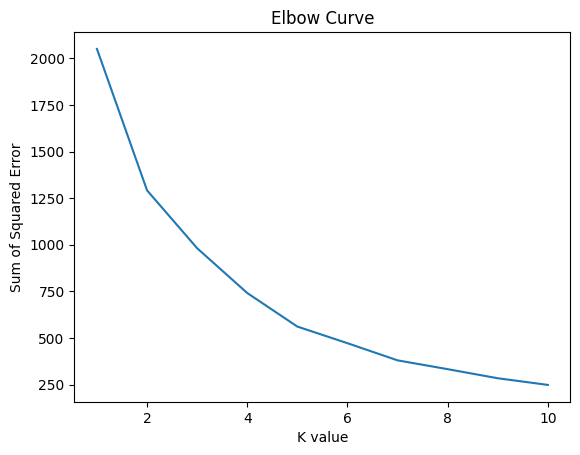

In [30]:
plt.plot(k_range, squared_errors)
plt.xlabel('K value')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Curve')

### Algoritmo de KMeans utilizando 5 como K (por conta do Elbow)

In [31]:
kmeans = KMeans(n_clusters=5)

In [32]:
simple_data = np.array(df.drop(['Main Class', 'Race'], axis=1))
print(simple_data)

[[ 9 14 16  8 20 13]
 [20 12 16  8 14 14]
 [20 14 10  8 18 10]
 [12 20 14  8 16 10]
 [ 7 14 12  8 14 20]
 [ 8 16 14 11 13 20]
 [11 16 18 11 13 20]
 [10 20 14  8 10 16]
 [ 7 16 12 12 16 20]
 [ 8 14 16 18 13 10]
 [20 12 16 12 10  8]
 [ 8 16 14 10 12 18]
 [18 14 16  8 16  8]
 [ 8 20 14 10 10 16]
 [ 8 12 14 10 20 15]
 [10 16 13 15 15 16]
 [ 8 14 12 10 14 18]
 [ 8 18 16 10 14 12]
 [20 12 14 10 10 16]
 [10 20 16 10 14  8]
 [12 20 12  8 12 14]
 [ 8 20 14 20 10 12]
 [10 14 16 12 20 14]
 [12 14 18 18 13 12]
 [18 14 16 10 12 16]
 [10 20 14 12 16 10]
 [18 14 14 10 10 14]
 [20 14 16  8 10 10]
 [ 8 14 14 12 20 12]
 [ 8 12 14 12 10 20]]


In [33]:
kmeans.fit(simple_data)
kmeans.labels_

c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 3, 2, 2, 2, 3, 2, 4, 1, 2, 1, 3, 0, 2, 2, 3, 1, 3, 3, 4,
       0, 4, 1, 3, 1, 1, 0, 2])

In [34]:
df['Group'] = kmeans.labels_
df

,Race,Main Class,Strength,Dexterity,Constitution,Intelligence,Wisdom,Charisma,Group
0,Aasimar,Ranger,9,14,16,8,20,13,0
1,Human,Fighter,20,12,16,8,14,14,1
2,Drow,Druid,20,14,10,8,18,10,1
3,Feral,Monk,12,20,14,8,16,10,3
4,Half-elf,Sorcerer,7,14,12,8,14,20,2
5,Tiefling,Sorcerer,8,16,14,11,13,20,2
6,Tiefling,Bard,11,16,18,11,13,20,2
7,Elf,Swords Bard,10,20,14,8,10,16,3
8,Fairy,Bard,7,16,12,12,16,20,2
9,Ardling,Wizard,8,14,16,18,13,10,4


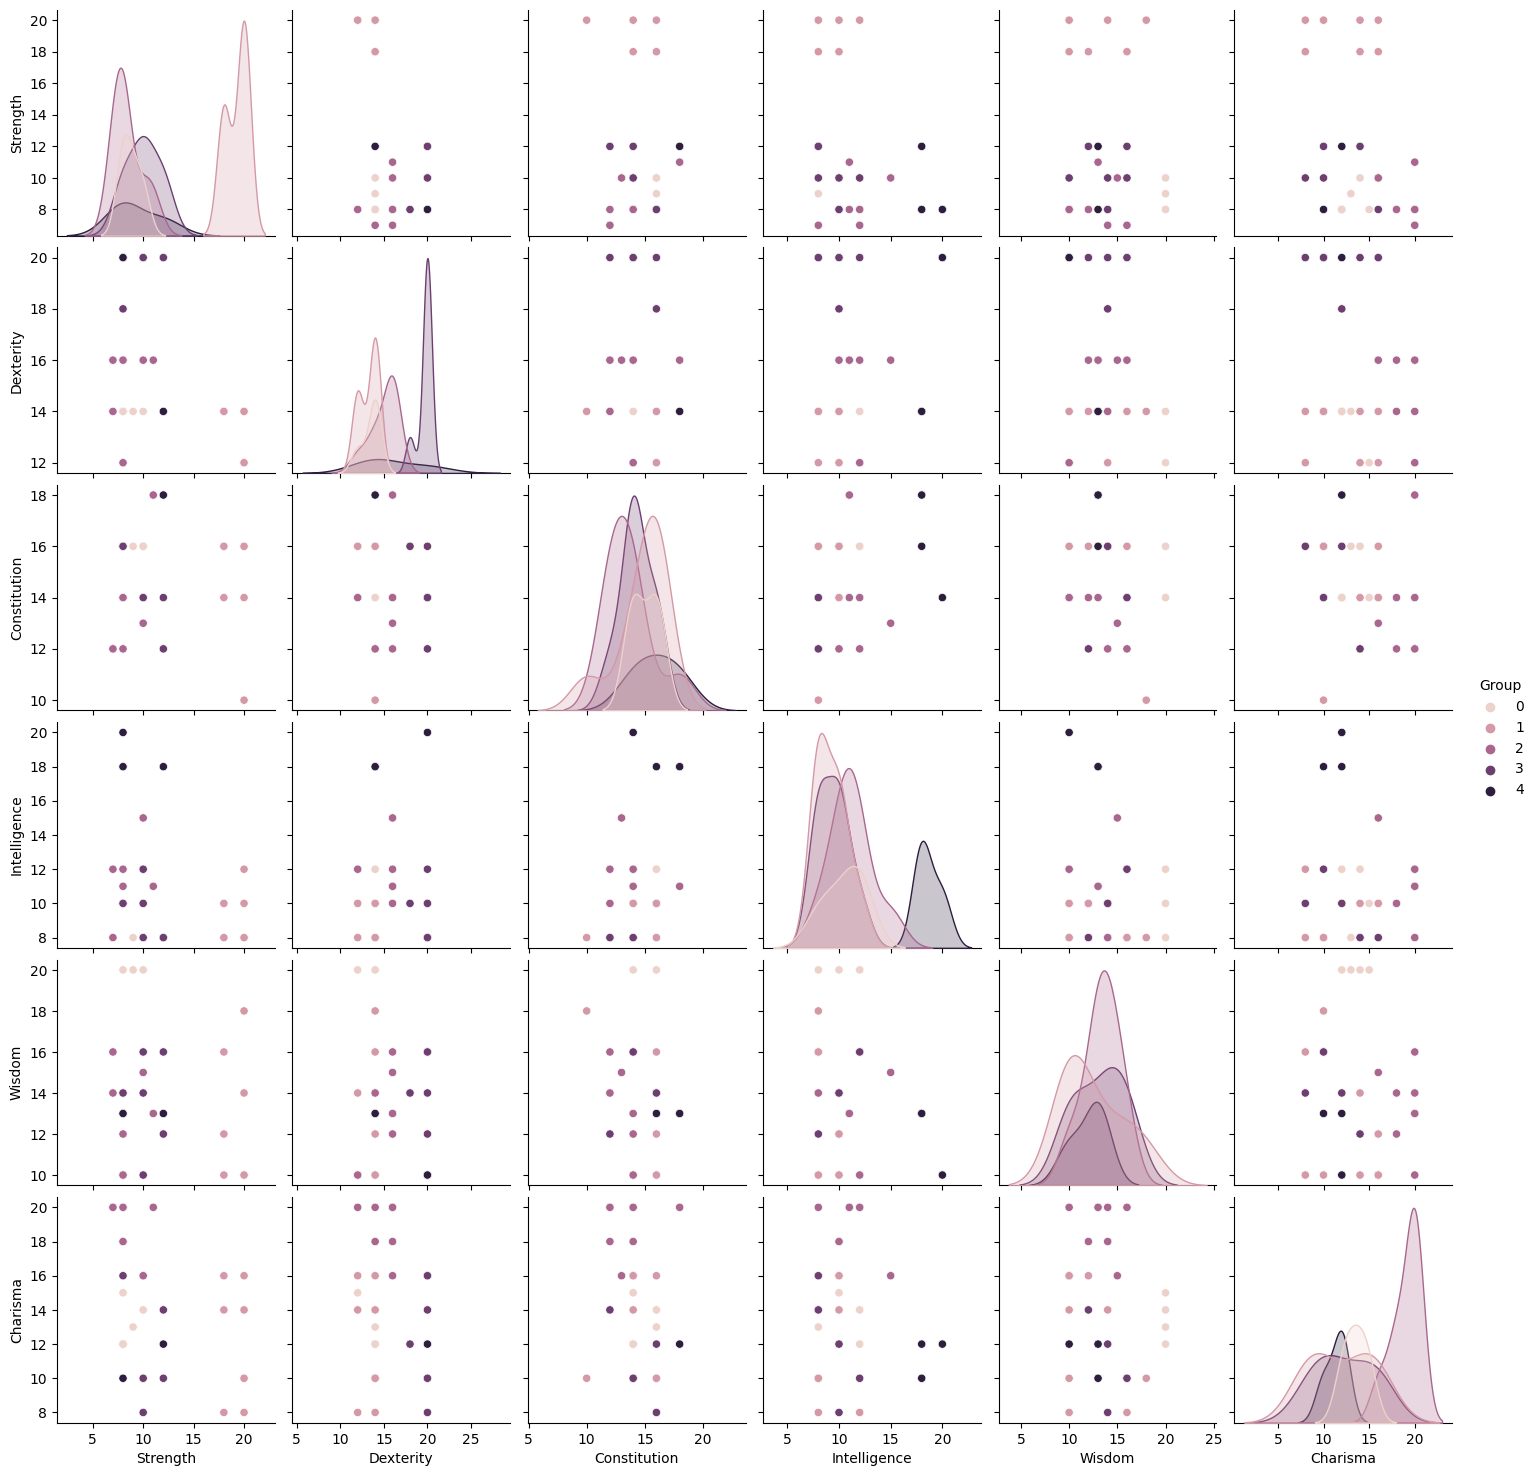

In [35]:
sns.pairplot(df, hue="Group")